# Problem Statement

The challenge for this Problem Statement is for you to explore various aspects of YouTube
optimization, including content quality, relevance, watch time, consistency, SEO,
engagement, collaborations, analytics, demographics, and social listening. Use your data
analysis skills to analyze the data of 50 Indian YouTubers given to you to determine the
reasons behind the increasing growth of certain YouTubers among them and also find the
solutions to some analytical questions given to you regarding the given data.

## Evaluation

1. In what other aspects can a Youtuber drive traffic to grow his channel apart from
key tags and descriptive titles, as his/her channel won’t show up in the top videos
after a search?

2. Who are the target audience on a video in each category and what should be the
ideal upload time for that YouTuber? Create an upload schedule for a YouTuber
according to his content category.

3. On the basis of this dataset, mention the top 10 upcoming YouTubers besides the
current top 10 YouTubers.

4. What are the most discussed words in YouTube under each category? In what topics
should a YouTuber do research in his category to bring about a new trend in his
category

5. What changes can a Youtuber make in his MetaData (title, tags, description,
captions) so that his videos show up in the top searches of Youtube and the
channel gets more traffic?

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from dateutil import parser
!pip install isodate
import isodate
import matplotlib.ticker as ticker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
channel = pd.read_csv("/content/dataset_datahack_channels.csv")
video = pd.read_csv("/content/dataset_datahack_videos.csv")

In [10]:
channel.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [11]:
video.drop(['Unnamed: 0.1','Unnamed: 0','index'],axis=1,inplace=True)

In [12]:
channel.columns

Index(['channel_id', 'channel_title', 'description', 'view_count',
       'subscriber_count', 'video_count', 'created_time', 'uploads',
       'other_links'],
      dtype='object')

In [13]:
channel

,channel_id,channel_title,description,view_count,subscriber_count,video_count,created_time,uploads,other_links
0,UCn_l37ETRGxVsVqPAZM-y7w,Onkiify,Ahoy! Gamers What is Up it's your Boi Onkiify....,1443714,4820,193,2017-05-18T17:27:05Z,UUn_l37ETRGxVsVqPAZM-y7w,['https://www.youtube.com/redirect?event=chann...
1,UCg3811K2k6ZW0T9wrUyq7UQ,Boyzz World Gaming,Sup Guys\n I'm just a Weirdo W...,761326,1690,196,2020-09-07T06:42:54.28756Z,UUg3811K2k6ZW0T9wrUyq7UQ,['https://www.youtube.com/redirect?event=chann...
2,UCO1-i4iqe_Kg0B-nwt5W0Gg,Majnu Gaming,"Hello Gamer's 😍\n\nHello Family, \nMera Name H...",290799,4690,468,2021-05-28T08:27:39.183399Z,UUO1-i4iqe_Kg0B-nwt5W0Gg,['https://www.youtube.com/redirect?event=chann...
3,UC6AhmVhClcDx2RPsFFw_fAA,SELEM YT,\nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...,6427859,133000,339,2021-03-03T00:59:54.797482Z,UU6AhmVhClcDx2RPsFFw_fAA,[]
4,UC5v-gTzCpaY257sxx-8P_-Q,Paglaa Tech,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184,2016-05-16T16:06:36Z,UU5v-gTzCpaY257sxx-8P_-Q,[]
5,UCHOrSFKttbAKpcyjnBfVqkw,Prabhat Gamer,Hi guys I am Prabhat from Uttarakhand❤️\n🎬This...,154045275,2150000,249,2022-05-22T13:37:27.30071Z,UUHOrSFKttbAKpcyjnBfVqkw,[]
6,UCQRSY8W2A1DST5qtm8NNhMA,SUBHAM HORE,So Hey Guys...!\nSUBHAM HORE Hare And Welcome ...,53777584,1110000,1072,2019-09-22T03:47:52Z,UUQRSY8W2A1DST5qtm8NNhMA,[]
7,UC2IuURiiASwNigfQJtXiRdQ,SILENT GIRL GAMING,🔔🔔 bell all pe set karlo 🔔🔔plz\n❤️My name =Ani...,260787957,2590000,1407,2021-03-12T11:47:09.443209Z,UU2IuURiiASwNigfQJtXiRdQ,['https://www.youtube.com/redirect?event=chann...
8,UC8k6b-QBPW79SOvO4C9hBOQ,Ziyan Ki Gang,"Actors Funny Motivational Video Creator, Short...",1640577,10300,384,2022-06-08T17:46:44.155104Z,UU8k6b-QBPW79SOvO4C9hBOQ,[]
9,UCo-61NMiPlPP6er3I9AcDvw,Comedy Box R k Gautam,हँसते रहो हँसाते रहो बस हमारा यही एक प्रयास है...,2852009,10100,297,2021-03-30T09:16:03.775671Z,UUo-61NMiPlPP6er3I9AcDvw,[]


In [14]:
video.columns

Index(['video_id', 'title', 'description', 'category_id', 'tags', 'duration',
       'view_count', 'likes', 'comments', 'upload_time', 'channel_title',
       'thumbnail', 'topic_categories', 'Comments'],
      dtype='object')

In [15]:
video.head(1)

,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...


# Data Pre-processing

In [16]:
video.isnull().sum()

video_id             0
title                0
description         18
category_id          0
tags                 0
duration             0
view_count           0
likes                0
comments             0
upload_time          0
channel_title        0
thumbnail            0
topic_categories     0
Comments             0
dtype: int64

In [17]:
video.shape

(471, 14)

In [18]:
video.dtypes

video_id            object
title               object
description         object
category_id          int64
tags                object
duration            object
view_count           int64
likes                int64
comments             int64
upload_time         object
channel_title       object
thumbnail           object
topic_categories    object
Comments            object
dtype: object

In [19]:
# Change Upload Time in 24 hr Format
video['upload_time'] = video['upload_time'].apply(lambda x: parser.parse(x))

In [20]:
# convert duration to seconds
video['durationSecs'] = video['duration'].apply(lambda x: isodate.parse_duration(x))
video['durationSecs'] = video['durationSecs'].astype('timedelta64[s]')

In [21]:
# Add number of tags
video['tagsCount'] = video['tags'].apply(lambda x: 0 if x is None else len(x))

In [22]:
# Comments and likes per 1000 view ratio
video['likeRatio'] = video['likes']/ video['view_count'] * 1000
video['commentRatio'] = video['comments']/ video['view_count'] * 1000

In [23]:
# Title character length
video['titleLength'] = video['title'].apply(lambda x: len(x))

In [24]:
video.head()

,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10 09:32:59+00:00,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...,1139.0,529,32.744869,7.772165,52
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29 06:30:09+00:00,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...,208.0,95,35.542747,2.401537,92
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26 05:16:10+00:00,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",...",808.0,514,55.554950,2.396488,77
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04 07:45:08+00:00,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...,770.0,240,43.776070,1.742848,26
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12 07:50:52+00:00,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...,967.0,527,39.412941,7.456849,53


In [25]:
channel.head()

,channel_id,channel_title,description,view_count,subscriber_count,video_count,created_time,uploads,other_links
0,UCn_l37ETRGxVsVqPAZM-y7w,Onkiify,Ahoy! Gamers What is Up it's your Boi Onkiify....,1443714,4820,193,2017-05-18T17:27:05Z,UUn_l37ETRGxVsVqPAZM-y7w,['https://www.youtube.com/redirect?event=chann...
1,UCg3811K2k6ZW0T9wrUyq7UQ,Boyzz World Gaming,Sup Guys\n I'm just a Weirdo W...,761326,1690,196,2020-09-07T06:42:54.28756Z,UUg3811K2k6ZW0T9wrUyq7UQ,['https://www.youtube.com/redirect?event=chann...
2,UCO1-i4iqe_Kg0B-nwt5W0Gg,Majnu Gaming,"Hello Gamer's 😍\n\nHello Family, \nMera Name H...",290799,4690,468,2021-05-28T08:27:39.183399Z,UUO1-i4iqe_Kg0B-nwt5W0Gg,['https://www.youtube.com/redirect?event=chann...
3,UC6AhmVhClcDx2RPsFFw_fAA,SELEM YT,\nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...,6427859,133000,339,2021-03-03T00:59:54.797482Z,UU6AhmVhClcDx2RPsFFw_fAA,[]
4,UC5v-gTzCpaY257sxx-8P_-Q,Paglaa Tech,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184,2016-05-16T16:06:36Z,UU5v-gTzCpaY257sxx-8P_-Q,[]


In [26]:
# Change created Time in 24 hr Format
channel['created_time'] = channel['created_time'].apply(lambda x: parser.parse(x))

In [27]:
channel.head()

,channel_id,channel_title,description,view_count,subscriber_count,video_count,created_time,uploads,other_links
0,UCn_l37ETRGxVsVqPAZM-y7w,Onkiify,Ahoy! Gamers What is Up it's your Boi Onkiify....,1443714,4820,193,2017-05-18 17:27:05+00:00,UUn_l37ETRGxVsVqPAZM-y7w,['https://www.youtube.com/redirect?event=chann...
1,UCg3811K2k6ZW0T9wrUyq7UQ,Boyzz World Gaming,Sup Guys\n I'm just a Weirdo W...,761326,1690,196,2020-09-07 06:42:54.287560+00:00,UUg3811K2k6ZW0T9wrUyq7UQ,['https://www.youtube.com/redirect?event=chann...
2,UCO1-i4iqe_Kg0B-nwt5W0Gg,Majnu Gaming,"Hello Gamer's 😍\n\nHello Family, \nMera Name H...",290799,4690,468,2021-05-28 08:27:39.183399+00:00,UUO1-i4iqe_Kg0B-nwt5W0Gg,['https://www.youtube.com/redirect?event=chann...
3,UC6AhmVhClcDx2RPsFFw_fAA,SELEM YT,\nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...,6427859,133000,339,2021-03-03 00:59:54.797482+00:00,UU6AhmVhClcDx2RPsFFw_fAA,[]
4,UC5v-gTzCpaY257sxx-8P_-Q,Paglaa Tech,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184,2016-05-16 16:06:36+00:00,UU5v-gTzCpaY257sxx-8P_-Q,[]


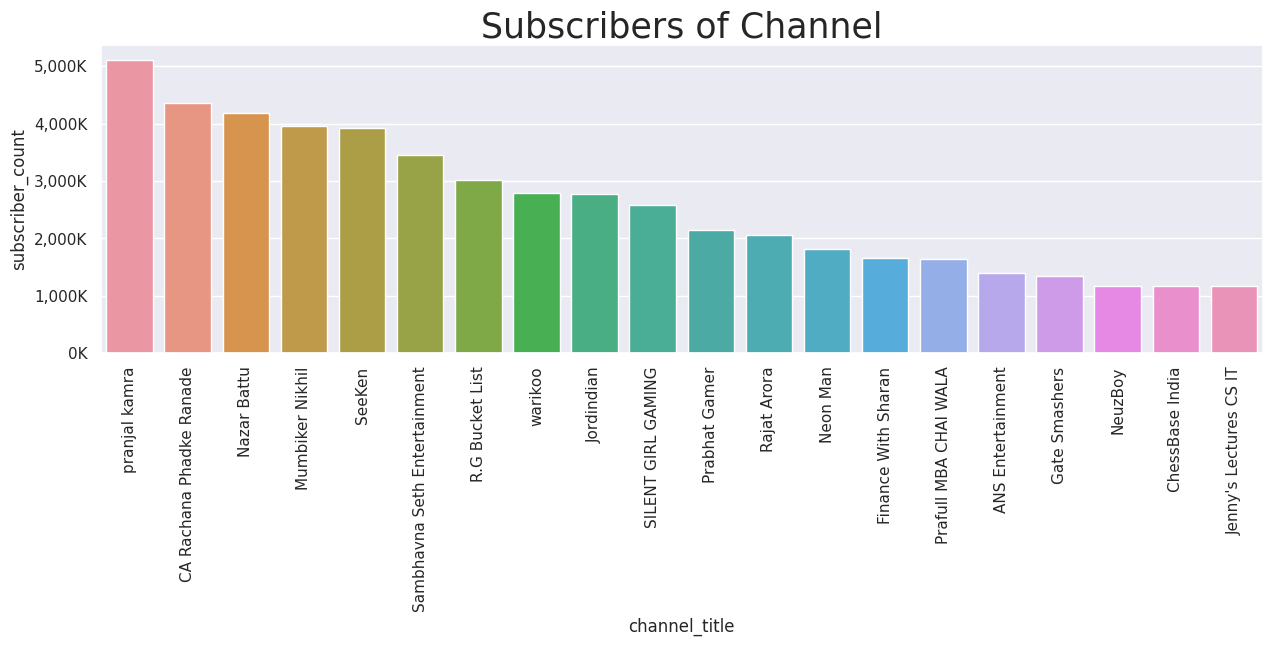

In [28]:
sns.set(rc={'figure.figsize':(15,4)})
plt.title("Subscribers of Channel",fontsize=25)
ax = sns.barplot(x='channel_title', y='subscriber_count', data=channel.sort_values('subscriber_count', ascending=False)[:20])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

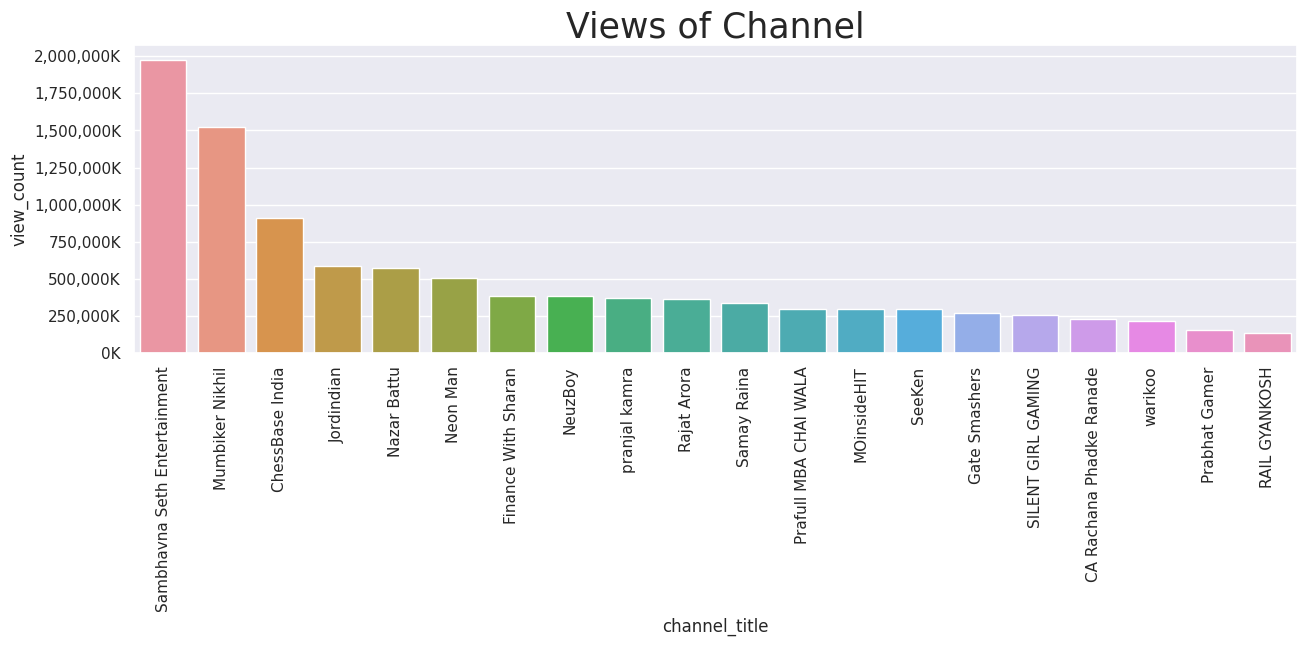

In [29]:
plt.title("Views of Channel",fontsize=25)
ax = sns.barplot(x='channel_title', y='view_count', data=channel.sort_values('view_count', ascending=False)[:20])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Views distribution per channel

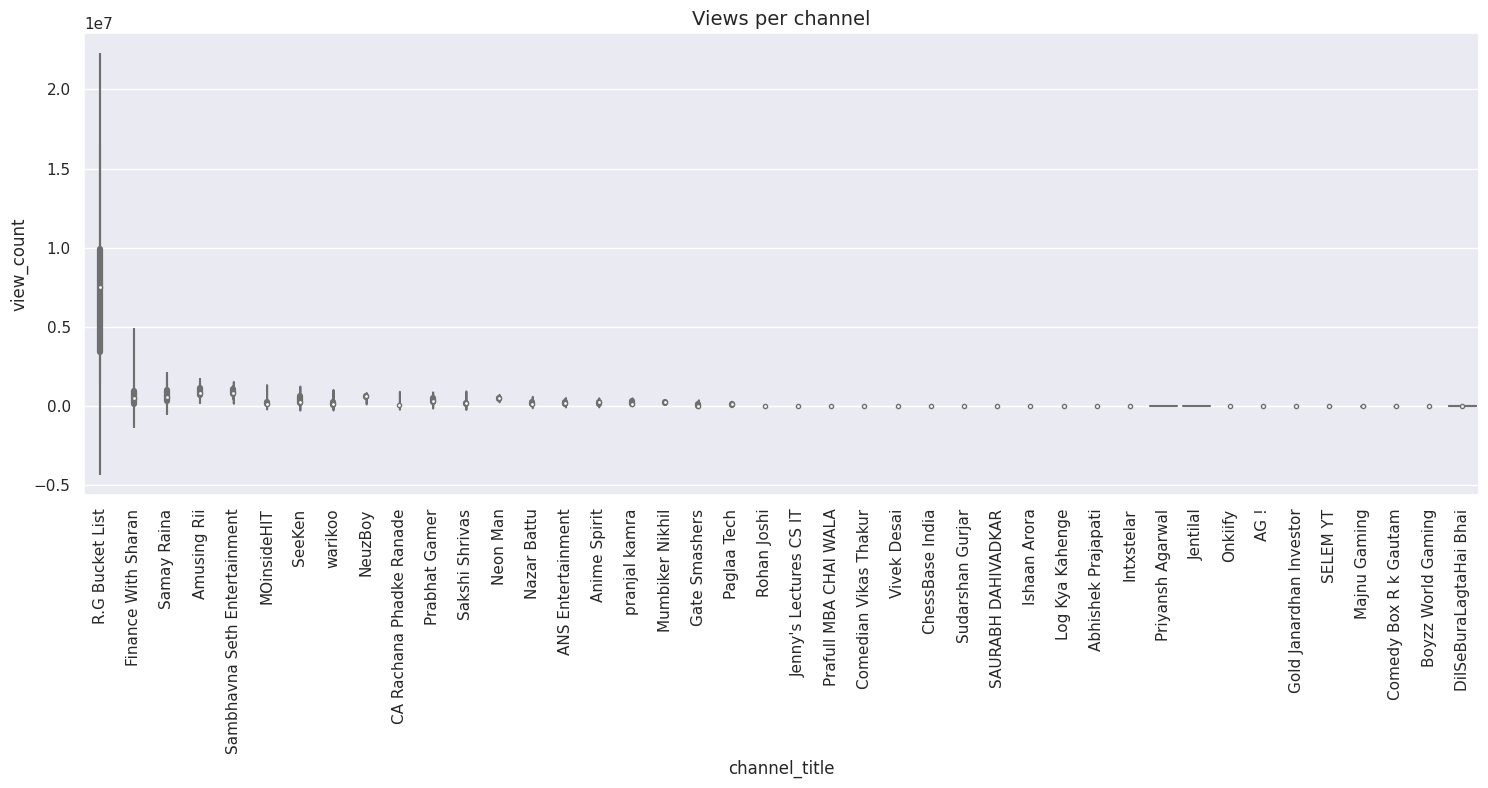

In [30]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(x = 'channel_title', y = 'view_count',data = video.sort_values('view_count',ascending=False), palette = 'pastel')
plt.title('Views per channel', fontsize = 14)
plt.xticks(rotation=90)
plt.show()

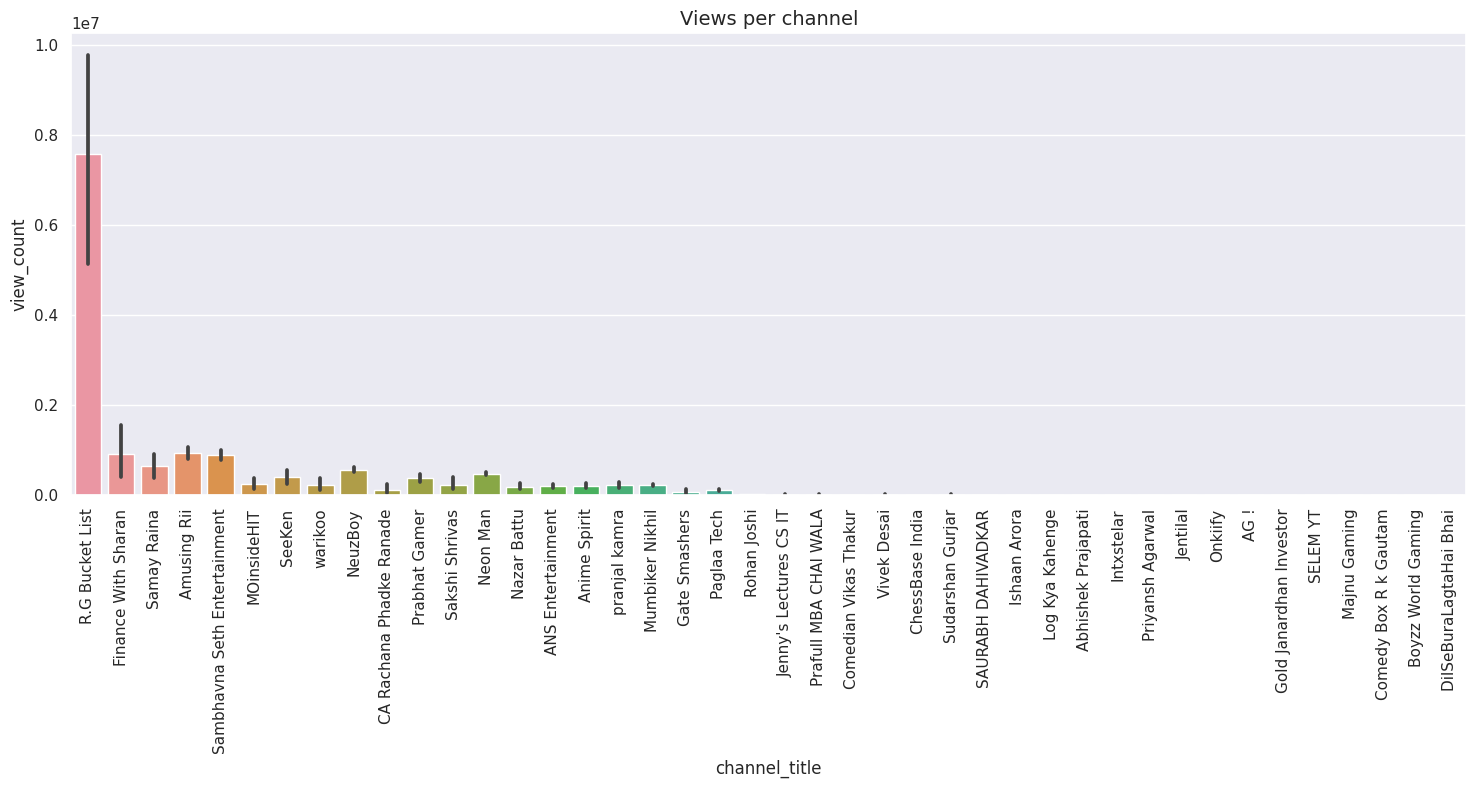

In [31]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.barplot(x = 'channel_title', y = 'view_count',data = video.sort_values('view_count',ascending=False))
plt.title('Views per channel', fontsize = 14)
plt.xticks(rotation=90)
plt.show()

## Does the number of likes and comments matter for a video to get more views?

<Axes: xlabel='likeRatio', ylabel='view_count'>

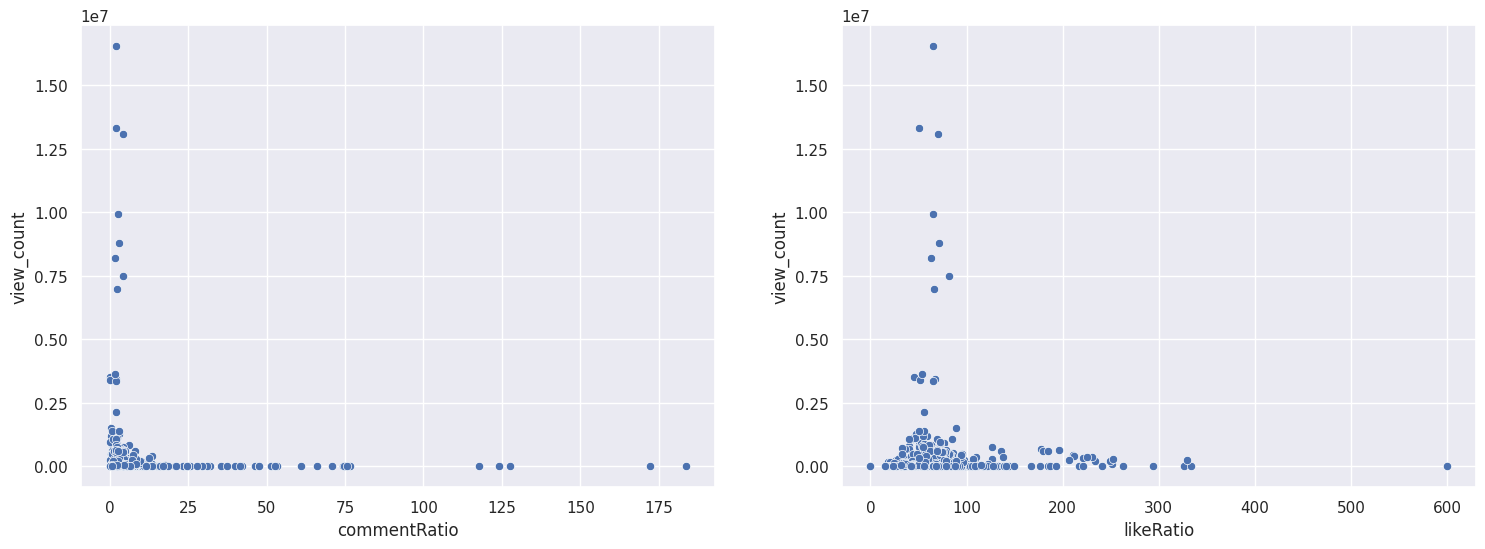

In [32]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video, x = "commentRatio", y = "view_count", ax=ax[0])
sns.scatterplot(data = video, x = "likeRatio", y = "view_count", ax=ax[1])

<Axes: xlabel='likeRatio', ylabel='view_count'>

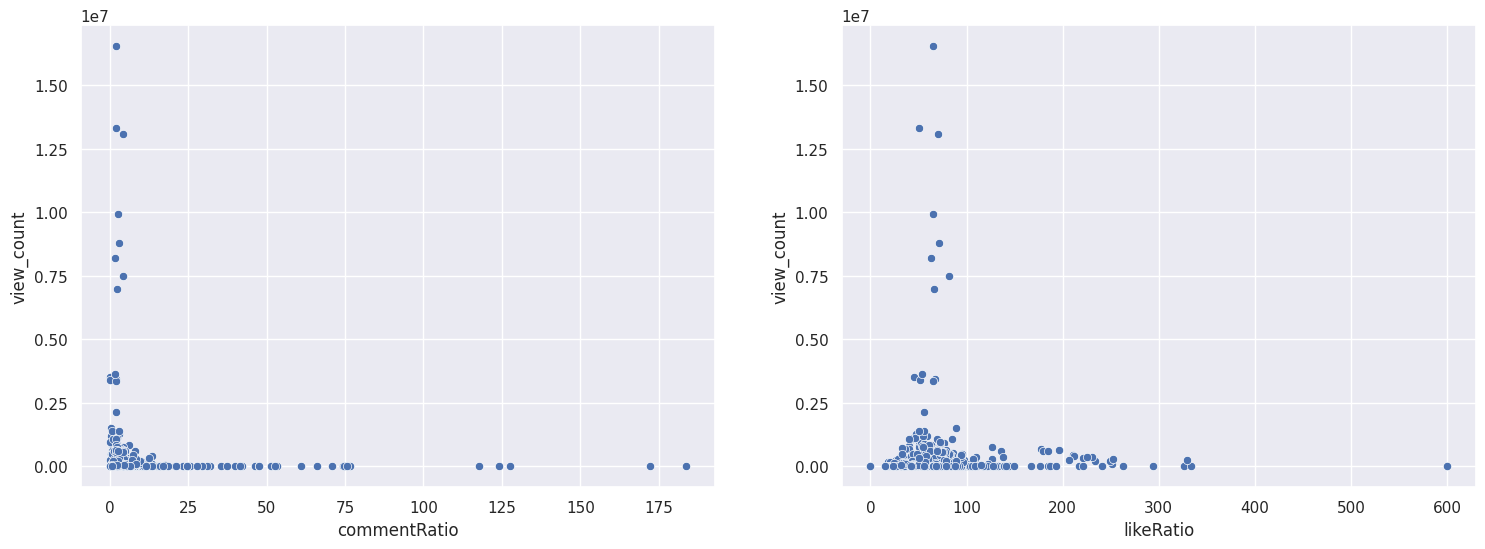

In [33]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video, x = "commentRatio", y = "view_count", ax=ax[0])
sns.scatterplot(data = video, x = "likeRatio", y = "view_count", ax=ax[1])

### Does the video duration matter for views and interaction (likes/ comments)?

<Axes: xlabel='durationSecs', ylabel='Count'>

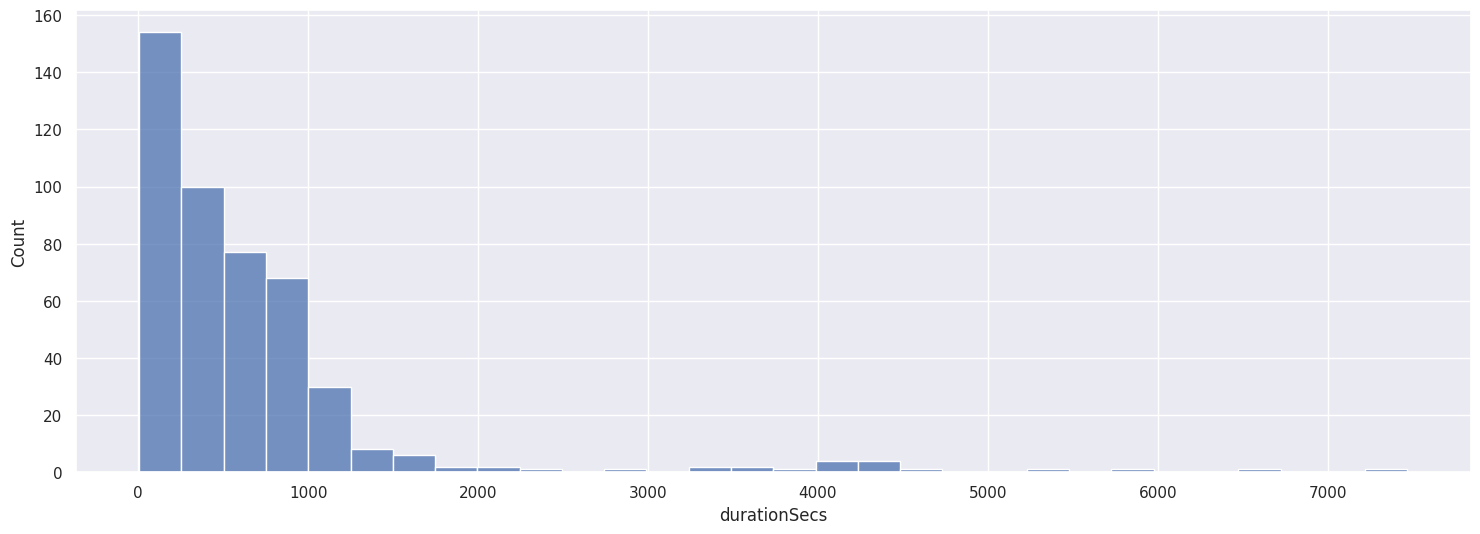

In [34]:
sns.histplot(data=video[video['durationSecs'] < 10000], x="durationSecs", bins=30)

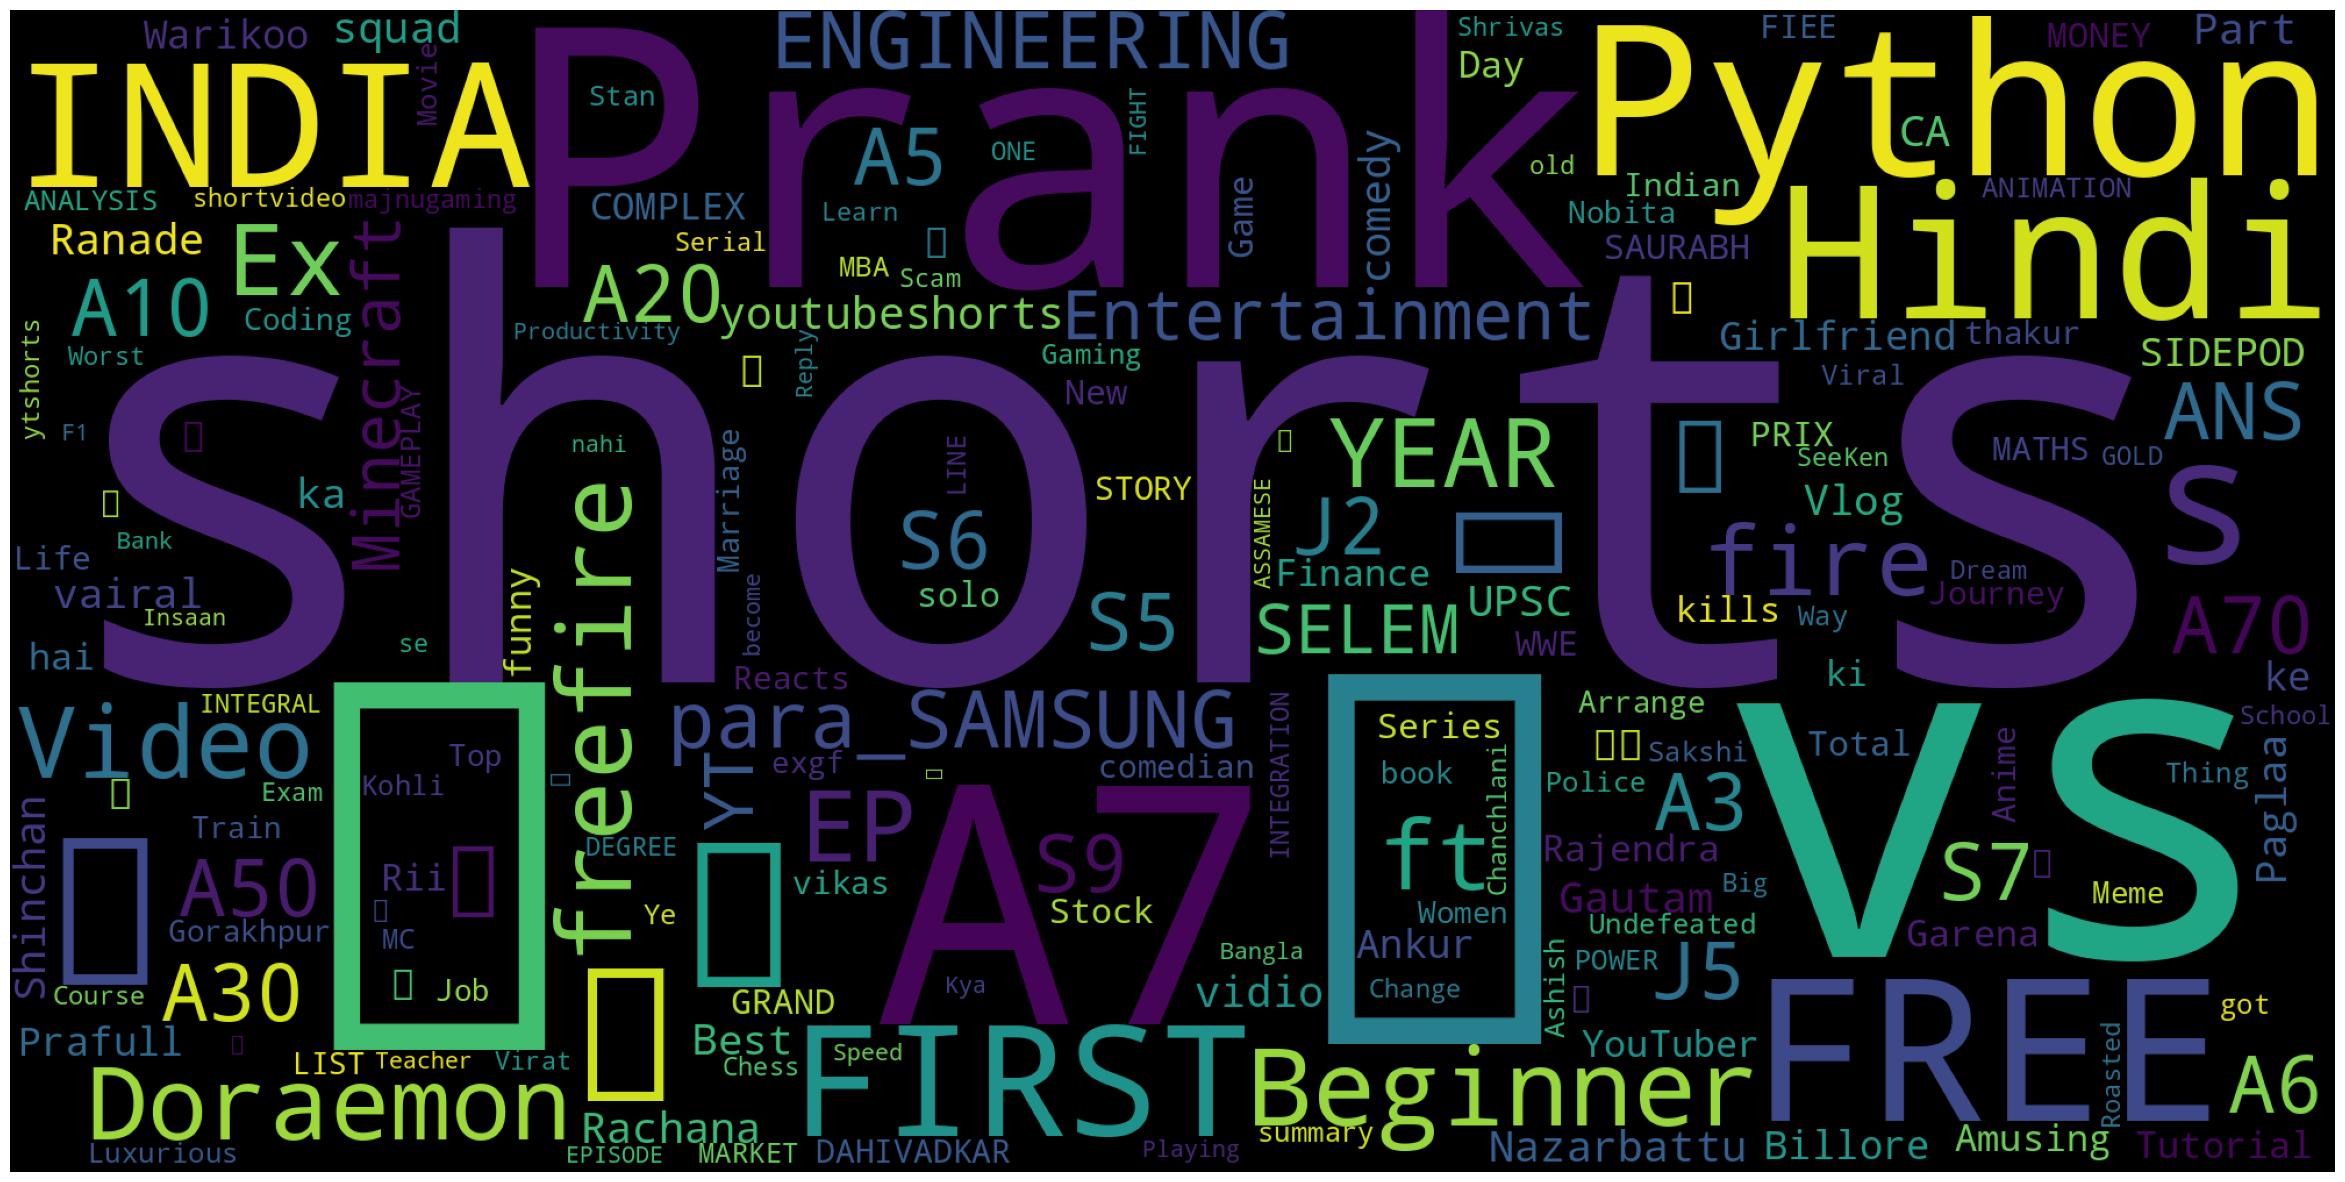

In [35]:
stop_words = set(stopwords.words('english'))
video['title_no_stopwords'] = video['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off")

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [36]:
video.columns

Index(['video_id', 'title', 'description', 'category_id', 'tags', 'duration',
       'view_count', 'likes', 'comments', 'upload_time', 'channel_title',
       'thumbnail', 'topic_categories', 'Comments', 'durationSecs',
       'tagsCount', 'likeRatio', 'commentRatio', 'titleLength',
       'title_no_stopwords'],
      dtype='object')

<Axes: xlabel='tagsCount', ylabel='view_count'>

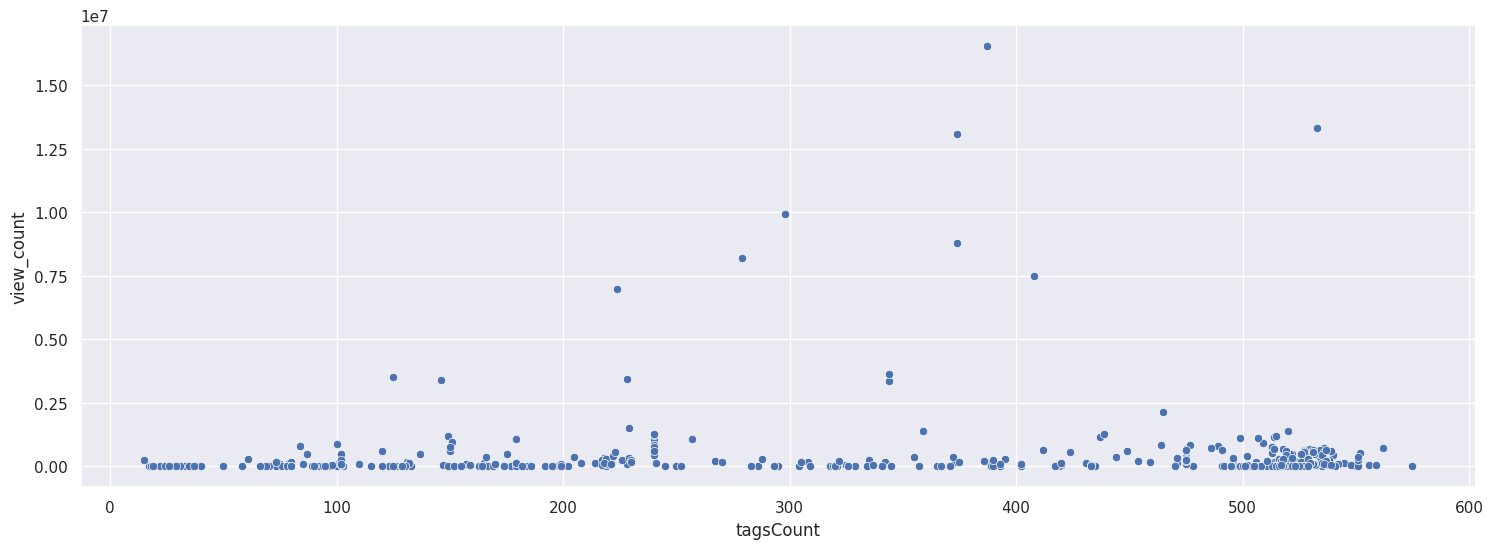

In [37]:
sns.scatterplot(data = video, x = "tagsCount", y = "view_count")

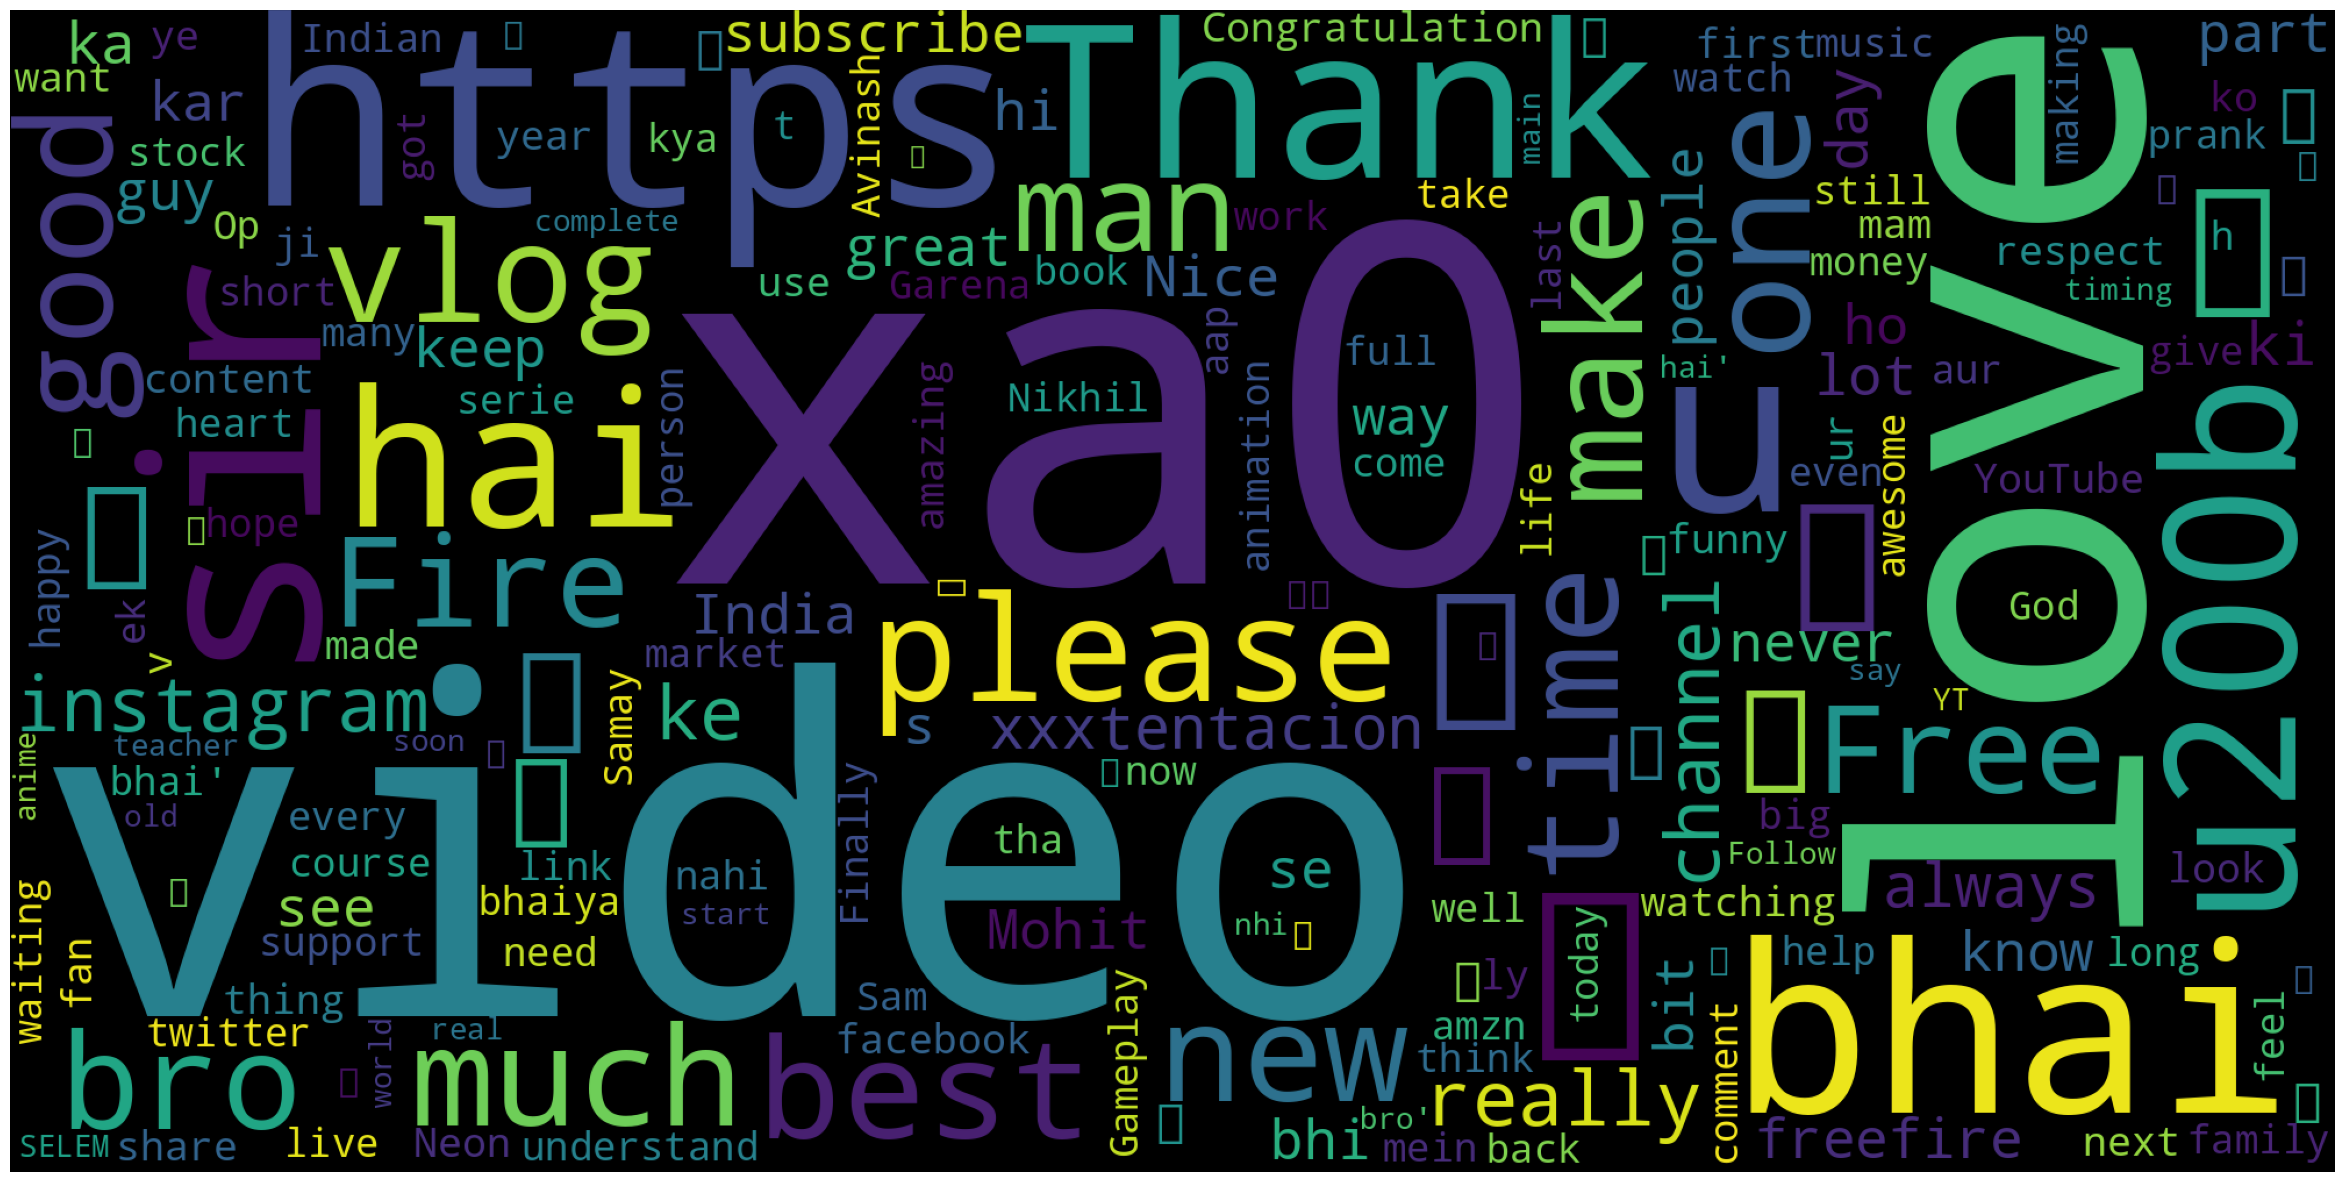

In [38]:
stop_words = set(stopwords.words('english'))
video['comments_no_stopwords'] = video['Comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [39]:
video.columns

Index(['video_id', 'title', 'description', 'category_id', 'tags', 'duration',
       'view_count', 'likes', 'comments', 'upload_time', 'channel_title',
       'thumbnail', 'topic_categories', 'Comments', 'durationSecs',
       'tagsCount', 'likeRatio', 'commentRatio', 'titleLength',
       'title_no_stopwords', 'comments_no_stopwords'],
      dtype='object')

<Axes: >

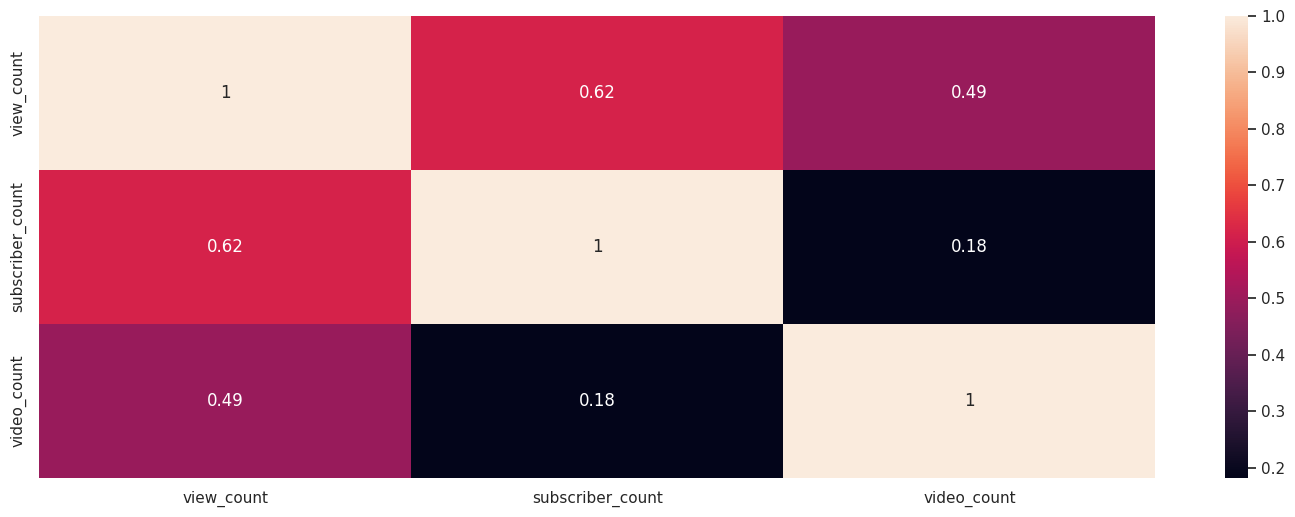

In [40]:
sns.heatmap(channel.corr(),annot=True)

<Axes: >

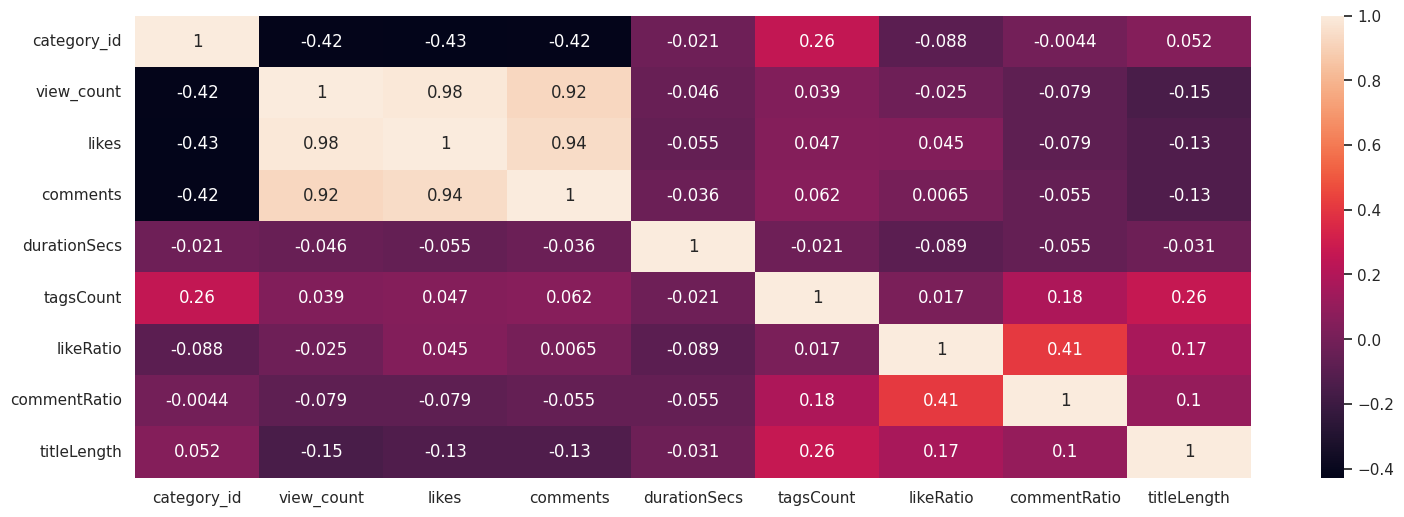

In [41]:
sns.heatmap(video.corr(),annot=True)

Likes and Comments are highly correlated to the view count of a video.

In [42]:
video['topic_categories'][0]

"['https://en.wikipedia.org/wiki/Action-adventure_game', 'https://en.wikipedia.org/wiki/Action_game', 'https://en.wikipedia.org/wiki/Role-playing_video_game', 'https://en.wikipedia.org/wiki/Video_game_culture']"

In [44]:
video['category'] = 0

In [90]:
import re
categories = []
index = 0
for i in video['topic_categories']:
    link_string = i
    links = link_string[1:-1].split(", ")
    list = []
    for link in links:
        # Use regex to find the category name at the end of the link
        match = re.search(r'/wiki/([^/]+)$', link)
        if match:
            category = match.group(1).replace('_', ' ')
            categories.append(category)
        list.append(category)
    video['category'][index] =  list
    index+=1

<ipython-input-90-ed2cbb7f1388>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video['category'][index] =  list


In [46]:
video['category'][0]

["Action-adventure game'",
 "Action game'",
 "Role-playing video game'",
 "Video game culture'"]

In [47]:
video

,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,...,topic_categories,Comments,durationSecs,tagsCount,likeRatio,commentRatio,titleLength,title_no_stopwords,comments_no_stopwords,category
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10 09:32:59+00:00,...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...,1139.0,529,32.744869,7.772165,52,"[Adopted, SMALLEST, FAMILY, Minecraft!, (Hindi)]","[['Favrt, COLOUR, BTAO, SUBSCRIBE, krke, Heart...","[Action-adventure game', Action game', Role-pl..."
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29 06:30:09+00:00,...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...,208.0,95,35.542747,2.401537,92,"[I, started, playing, chess, I, three, years, ...","[['Congratulations, Aswath, Varun.., Way, go, ...","[Hobby', Lifestyle (sociology)']"
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26 05:16:10+00:00,...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",...",808.0,514,55.554950,2.396488,77,"[#1, How, @BBKiVines, become, 1, India’s, RICH...","[[""So, nice, explaining,, can't, express, word...",[Society']
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04 07:45:08+00:00,...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...,770.0,240,43.776070,1.742848,26,"[Mere, paas, SABOOT, nahi, hai!]","[['I, recently, delivered, baby, boy., He, 10,...",[Lifestyle (sociology)']
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12 07:50:52+00:00,...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...,967.0,527,39.412941,7.456849,53,"[The, BIRTH, DEATH, Minecraft, ELEPHANT!, 😱, (...","[['Pet, btao, Subscribe, krke, Heart, lelo, \r...","[Action-adventure game', Action game', Role-pl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",PT59S,2351,185,0,2023-02-21 12:57:44+00:00,...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Hello Everyone, My Name is Ishaan Arora.I'm ...",59.0,129,78.689919,0.000000,45,"[""Tell, Yourself"", ka, SABSE, SAHI, Answer]","[[""Hello, Everyone,, My, Name, Ishaan, Arora.I...",[Knowledge']
467,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",PT32M10S,38969,1245,182,2023-03-16 14:30:01+00:00,...,"['https://en.wikipedia.org/wiki/Business', 'ht...",['Get my new book ‘GET EPIC SHIT DONE’ here: h...,1930.0,517,31.948472,4.670379,95,"[Is, 2023, BEST, YEAR, START, UP?, |, Antler, ...","[['Get, new, book, ‘GET, EPIC, SHIT, DONE’, he...","[Business', Society']"
468,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",PT9M,34971,1451,80,2023-03-05 08:30:18+00:00,...,['https://en.wikipedia.org/wiki/Society'],['I showed this video to my spouse. She is

In [48]:
set(categories)

{"Action game'",
 "Action-adventure game'",
 "Association football'",
 "Business'",
 "Cricket'",
 "Electronic music'",
 "Entertainment'",
 "Fashion'",
 "Film'",
 "Food'",
 "Health'",
 "Hip hop music'",
 "Hobby'",
 "Humour'",
 "Knowledge'",
 "Lifestyle (sociology)'",
 "Motorsport'",
 "Music of Asia'",
 "Music of Latin America'",
 "Music'",
 "Performing arts'",
 "Pet'",
 "Religion'",
 "Role-playing video game'",
 "Society'",
 "Sport'",
 "Sports game'",
 "Strategy video game'",
 "Technology'",
 "Television program'",
 "Tourism'",
 "Vehicle'",
 "Video game culture'"}

# Question 1

In what other aspects can a Youtuber drive traffic to grow his channel apart from key tags and descriptive titles, as his/her channel won’t show up in the top videos after a search?

In [49]:
video.columns

Index(['video_id', 'title', 'description', 'category_id', 'tags', 'duration',
       'view_count', 'likes', 'comments', 'upload_time', 'channel_title',
       'thumbnail', 'topic_categories', 'Comments', 'durationSecs',
       'tagsCount', 'likeRatio', 'commentRatio', 'titleLength',
       'title_no_stopwords', 'comments_no_stopwords', 'category'],
      dtype='object')

<Axes: >

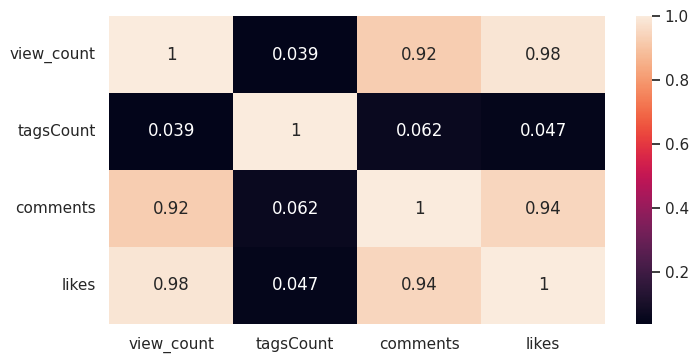

In [54]:
plt.figure(figsize=(8,4))
sns.heatmap(video[['view_count','tagsCount','comments','likes','duration']].corr(),annot=True)

Likes and Comments are highly correlated to view count. 
So, You come in search result, video should have good likes and comments.
Video should be useful and informative to get likes and engaing also to get more comments.

# Q 2

Who are the target audience on a video in each category and what should be the ideal upload time for that YouTuber? Create an upload schedule for a YouTuber according to his content category.

In [71]:
cat = set(categories)

In [72]:
len(cat)

33

In [76]:
topic = []
for i in cat:
  x = i[:-1]
  topic.append(x)

33


In [78]:
for i in video['category']:
  print(type(i))
  

<class 'list'>


In [91]:
categ = pd.DataFrame(categories)

In [93]:
categ[0].value_counts().head(10)

Entertainment'              158
Film'                       134
Lifestyle (sociology)'       91
Knowledge'                   79
Video game culture'          70
Action game'                 57
Society'                     54
Role-playing video game'     31
Humour'                      29
Action-adventure game'       27
Name: 0, dtype: int64

In [95]:
video.columns

Index(['video_id', 'title', 'description', 'category_id', 'tags', 'duration',
       'view_count', 'likes', 'comments', 'upload_time', 'channel_title',
       'thumbnail', 'topic_categories', 'Comments', 'durationSecs',
       'tagsCount', 'likeRatio', 'commentRatio', 'titleLength',
       'title_no_stopwords', 'comments_no_stopwords', 'category'],
      dtype='object')

In [97]:
# Create publish day (in the week) column 
video['pushblishDayName'] = video['upload_time'].apply(lambda x: x.strftime("%A")) 

In [100]:
video['pushblishDayName']

0         Friday
1      Wednesday
2         Sunday
3       Saturday
4         Sunday
         ...    
466      Tuesday
467     Thursday
468       Sunday
469       Monday
470     Saturday
Name: pushblishDayName, Length: 471, dtype: object

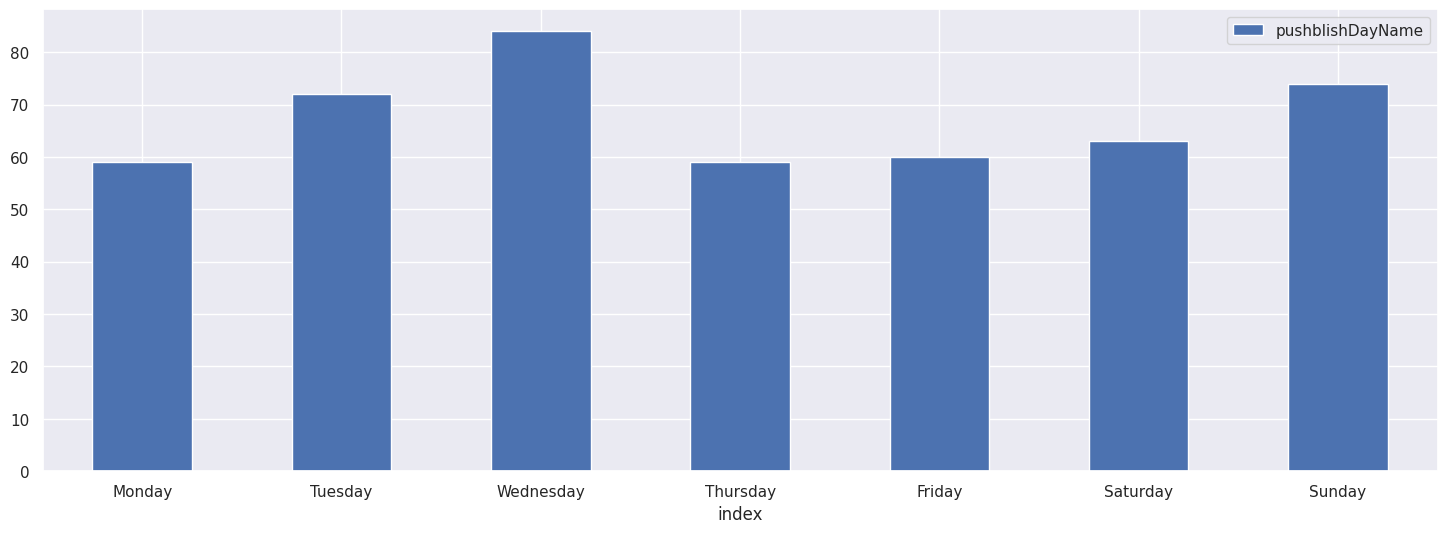

In [106]:
day_df = pd.DataFrame(video['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)
